<h2>This is the simple workflow with graph</h2>

In [1]:
def function_1(input_1):
    return "This is " + input_1 + " from First Function "

def function3(input3):
    return input3 + ' kiran'
    
def function_2(input_2):
    output=function3("calling function 3.. in between to get second name")
    return input_2 + output + " to Second Function"


In [2]:
from langgraph.graph import Graph

# Define a Langchain graph
workflow1 = Graph()

workflow1.add_node("func_1", function_1)
workflow1.add_node("func_2", function_2)

workflow1.add_edge('func_1', 'func_2')

workflow1.set_entry_point("func_1")
workflow1.set_finish_point("func_2")

app1 = workflow1.compile()

In [3]:
app1.invoke('Tej')

'This is Tej from First Function calling function 3.. in between to get second name kiran to Second Function'

In [4]:
input = 'I am moving from'
for output in app1.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'func_1':
---
This is I am moving from from First Function 

---

Output from node 'func_2':
---
This is I am moving from from First Function calling function 3.. in between to get second name kiran to Second Function

---



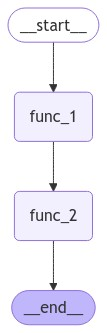

In [5]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [6]:
app1.invoke("mahi")

'This is mahi from First Function calling function 3.. in between to get second name kiran to Second Function'

<h2>Now let's create a workflow with LLM</h2>

In [7]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

c:\Users\TEJKIRAN\anaconda3\envs\langgraph\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
llm.invoke('hi').content

'Hello there! How can I assist you today?'

In [9]:
def function1(input):
    llm=ChatGoogleGenerativeAI(model="gemini-1.0-pro")
    response=llm.invoke(input).content
    return response

In [10]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [11]:
from langgraph.graph import Graph
workflow2=Graph()

In [12]:
workflow2.add_node("llm",function1)

In [13]:
workflow2.add_node("upper_string",function2)

In [14]:
workflow2.add_edge("llm","upper_string")

In [15]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [16]:
app2=workflow2.compile()

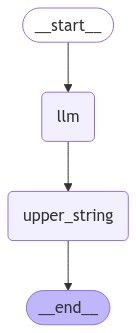

In [17]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [18]:
app2.invoke("what is a name of first indian prime minister?")

'JAWAHARLAL NEHRU'

In [19]:
print(app2.invoke("What is tiger?"))

TIGER (PANTHERA TIGRIS) IS A SPECIES OF MAMMAL OF THE FELIDAE FAMILY. IT IS THE LARGEST OF ALL THE WILD CATS.

**PHYSICAL CHARACTERISTICS:**

* **SIZE:** TIGERS ARE THE LARGEST CATS, WITH MALES TYPICALLY MEASURING 180-290 CM IN BODY LENGTH AND WEIGHING 180-310 KG. FEMALES ARE SMALLER, TYPICALLY MEASURING 160-250 CM AND WEIGHING 100-160 KG.
* **COLOR:** TIGERS HAVE A DISTINCTIVE ORANGE-BROWN COAT WITH BLACK STRIPES. THE PATTERN OF STRIPES IS UNIQUE TO EACH INDIVIDUAL.
* **TAIL:** TIGERS HAVE A LONG, MUSCULAR TAIL THAT TYPICALLY MEASURES 60-110 CM.
* **TEETH:** TIGERS HAVE POWERFUL JAWS WITH LARGE, SHARP TEETH. THEIR CANINES CAN MEASURE UP TO 10 CM IN LENGTH.

**DISTRIBUTION AND HABITAT:**

* TIGERS WERE ONCE FOUND THROUGHOUT ASIA, FROM THE CASPIAN SEA TO THE PACIFIC OCEAN. TODAY, THEY ARE RESTRICTED TO FRAGMENTED POPULATIONS IN:
    * RUSSIA (SIBERIAN TIGER)
    * INDIA (BENGAL TIGER)
    * BANGLADESH (BENGAL TIGER)
    * NEPAL (BENGAL TIGER)
    * BHUTAN (BENGAL TIGER)
    * MYANMAR (B

In [20]:
input = 'What is the best thing to do in japan'
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
**Cultural Immersion:**

* **Visit historical temples and shrines:** Explore iconic landmarks such as Kiyomizu-dera, Fushimi Inari Shrine, and Kinkaku-ji.
* **Attend traditional festivals:** Immerse yourself in Japanese culture at festivals like the Gion Matsuri, Nebuta Festival, and Yuki Matsuri.
* **Learn about tea ceremony and calligraphy:** Experience traditional Japanese arts and customs at tea houses and calligraphy workshops.

**Natural Wonders:**

* **Hike Mount Fuji:** Ascend Japan's iconic mountain for breathtaking views of the country.
* **Visit national parks:** Explore the natural beauty of Japan at parks like Nikko National Park, Hakone National Park, and Shiretoko National Park.
* **Admire cherry blossoms:** Witness the stunning spectacle of cherry blossoms blooming throughout the country during spring.

**Cuisine and Dining:**

* **Taste authentic sushi and sashimi:** Indulge in the freshest seafood at traditional sushi restaurants and fi

<h2>Now lets create our output token counter</h2>

In [21]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [22]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

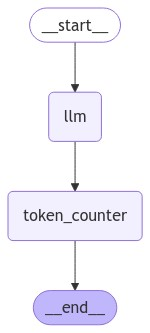

In [23]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [24]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 2'

In [25]:
input="Who is current president of USA?"

In [26]:
for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
Joe Biden


here is output from token_counter
_______
total token number is 2


